<center>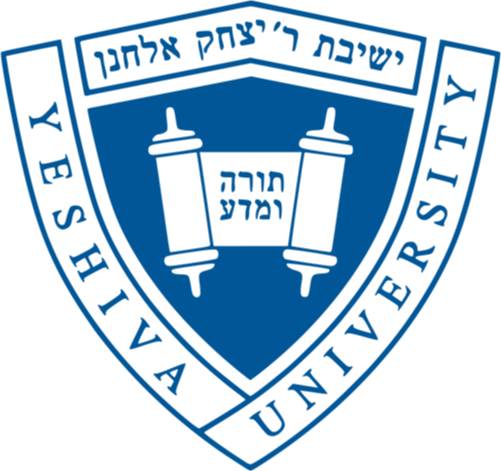</center>

# <center>Katz School of Science and Health</center>
# <center>AIM 5004 Predictive Models</center>
<p>

# <center>Final Project</center>
<br><br>
## <center>Team B</center>

### <center>Radek Holik<br>Haider Ali<br>Yujie Wu</center>
<br>
<br>

# Final project


You are a team of data scientists and ML engineers working for a recipe website.

Every day your website receives recipe submissions from users. The recipes are analyzed by a lab to ascertain their nutritional content. Then the recipe is posted on your website along with its nutrition information.  Your company makes money by running ads along with the recipes.

Recently, ad space on high-protein receipes has been in high demand, so the company is interested in maximizing the use of the high-protein recipes that users submit. The problem is that the lab generally can't analyze recipes as quickly as they are submitted, so their queue is always full.

The good news is that the lab will let you push recipes to the front of the queue so that they will get processed sooner.  If you suspect a recipe will, after analysis, be labeled "high protein", then it would be a good idea to push it to the front of the queue.

Your team's job is to build a model that predicts whether a recipe is high protein based on features of the recipe (ex., the ingredients). Each new recipe will be presented to your model. If you model predicts that it will be high protein, then that receipe will be pushed to the front of the lab's queue. Otherwise it will be pushed to the back ofthe lab's queue.

# Data

The data set is available under Module 8 as `final_data_set.csv`. The data are from recipes that have already been analyzed by the lab. The columns labeled `calories` and `protein` are the lab's output. We'll say that a recipe is "high protein" if `protein / calories > .10`.  All of the other columns are features of the recipe.

The ordering of the rows is immaterial.

# Model

Your model should predict whether a recipe is high protein based on the recipe's features.


As you develop your model, be sure to justify each decision you make.

# Dollars

Predictions are great -- as a starting point. But no business ever got to IPO by saying, "We have the best mean-squared-error in our industry!" Instead, businesses survive and thrive by earning money.

Since your team is part of a business, you'll need to understand the dollar value of your model: How much more money could your company earn if they deployed your model?

Fortunately, you have a simulator that can turn model predictions into ad revenue estimates. The simulator simulates
- the users' recipe submissions
- pushing recipes onto the front or back of the lab's queue based on your model's predictions
- the lab's daily recipe analysis
- daily ad revenue from high- and low- protein ads

The simulator's not perfect, but it can used to evaluate your model is dollar terms. Doing this can help compare the value of your model to the value of other teams' efforts to improve the business -- whether they are building models, writing code, selling ads, designing web pages, or doing whatever else makes your business work.

The input to the simulator is `hp_predictions_and_actuals`, a list of tuples `(prediction, actual)`. `actual` should be 1 if the recipe is high protein and 0 if the recipe is not high protein. `prediction` should be your model's prediction of `actual`, based on a recipe's features. (N.B.: `simulate()` doesn't use the recipe's features.)

`hp_predictions_and_actuals` might look like:
```
hp_predictions_and_actuals = [
    (1, 1),  # predict high-protein, actually high-protein
    (0, 1),  # predict low-protein, actually high-protein
    (0, 0),  # predict low-protein, actually low-protein
    (1, 1),  # predict high-protein, actually high-protein
    .
    .
    .
]
```

You could construct `hp_predictions_and_actuals` with `hp_predictions_and_actuals = list(zip(predictions, actuals))` if you had a list (or an ndarray or a Pandas Series) of predictions and another of actuals.

To use `simulate()`, you'll probably create one entry in `hp_predictions_and_actuals` for each row in the data frame then call `simulate(hp_predictions_and_actuals)`. This call will return an estimate of one year's revenue.  Please see the comments in `simulate()` for more information.

Evaluate your model in dollar terms using `simulate()`. `simulate()`'s output is a random variable, so please report the standard error of your model's dollar value, too.
- How much better is your model than random guessing?
- How much worse is your model than the best possible model? (Hint: What would be the predictions of the best possible model?)

In [1]:
def simulate(hp_predictions_and_actuals):
    high_protein_ad_revenue = 1
    low_protein_ad_revenue = .25
    
    ad_revenue = 0
    analysis_queue = []
    active_recipes = []
    i_data = 0
    for _ in range(365):  # for one year
        # 50-100 recipe submissions/day
        num_submissions = np.random.randint(50, 100)
        for __ in range(num_submissions): # 
            if i_data < len(hp_predictions_and_actuals):
                p, a = hp_predictions_and_actuals[i_data]
                
                if p == 1:  # go to the front of the queue
                    analysis_queue.insert(0, a)

                else: # go to the back of the queue
                    analysis_queue.append(a)
                i_data += 1
            
        # can analyze only 25 recipes/day   
        for __ in range(25):
            if len(analysis_queue)==0:
                break
            acutal = analysis_queue.pop(0)
            active_recipes.append(acutal)
                          
        # run 500-1000 ads/day
        num_ads_today = np.random.randint(500, 1000)
        for a in random.choices(active_recipes, k = num_ads_today):
            # a==1 if recipe is high protein
            if a==1:
                ad_revenue += high_protein_ad_revenue
            else:
                ad_revenue += low_protein_ad_revenue
    
    return ad_revenue

# Presentation

Your team will give a 20 minute presentation in class. (Note: The syllabus said 30 minutes. Make it 20.) 

Your presentation should explain your process of building and evaluating your model, inform us of the expected dollar impact on the business, and provide justification for your claims.

# Model evaluation

Your model will be evaluated on a held-out (and hidden) set of data using `simulate()`.

For this purpose, please supply a Python function that implements your model with this signature:
```
def predict(df):
```
`predict()` should return a list (or ndarray or Pandas Series) of predictions, one for each row of the input dataframe, `df`.  `df` will look just like the dataframe in `final_data_set.csv`, except the columns `calories` and `protein` will be absent.

There are two parts to the evaluation:

1. Does your model do better than random guessing?
2. Does your model do better than the other team's model?

For part (2): I will run an A/B test to compare the two teams' models on `simulate()`'s output on the held-out data set. The team whose model performs better wins. Each member of the winning team gets to drop their lowest homework grade.

# Tips

Some techniques that might be helpful:

- linear regression
- logistic / GLM regression
- hypothesis testing
- regularization, including hyperparameter tuning
- bootstrap sampling
- data transformations / feature engineering
- ask your instructor for clarification when you think you need it

You might not need all of them. Also, you might find techniques to be helpful that are not listed.



# Notes

- Each team should submit a single Jupyter notebook.
- The notebook must contain the `predict()` function.
- There will be three teams, 
Team A: Ovadia, Siddanta, Pinxue, Kalisetty
Team B: Holik, Haider, Yujie 
Team C: Ruslan, Harsha, Sheng-Han,  Aayush

# __Solution:__

# __Package import__

In [2]:
# Import some important packages here
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge



import warnings
warnings.filterwarnings("ignore")

# __1. Data preparation__

### __Original dataset__

In [3]:
df = pd.read_csv(r"final_data_set.csv", index_col = 0)
df.head()

,title,calories,protein,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,Rhubarb Roulade,256.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Caramel Macadamia Nut Crunch,223.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Grand Marnier Brownie Kisses,195.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Herb Salad Spring Rolls with Spicy Peanut Sauce,224.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Festival,219.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f"Number of rows : {len(df.axes[0])}")
print(f"Number of columns : {len(df.axes[1])}")

Number of rows : 10593
Number of columns : 672


In [5]:
print(f"Number of NAN values : {np.sum(list(df.isnull().sum()))}")

Number of NAN values : 0


In [6]:
# Remove the title column
df.drop("title", axis = 1, inplace = True)

### __Extended dataset about the "high_protein" column__

In [7]:
df["high_protein"] = np.where((df["protein"] / df["calories"]) > .10, 1, 0)
df.head()

,calories,protein,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,high_protein
0,256.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,223.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,195.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,224.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,219.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
# Remove the calories and protein columns
df.drop(["calories", "protein"], axis = 1, inplace = True)

### __Distribution of Protein Samples__

In [9]:
# Calculate the distribution of the "high_protein" column
high_protein_counts = df['high_protein'].value_counts()
print(f"Number of low protein recipes : {high_protein_counts[0]}")
print(f"Number of high protein recipes : {high_protein_counts[1]}")

Number of low protein recipes : 10061
Number of high protein recipes : 532


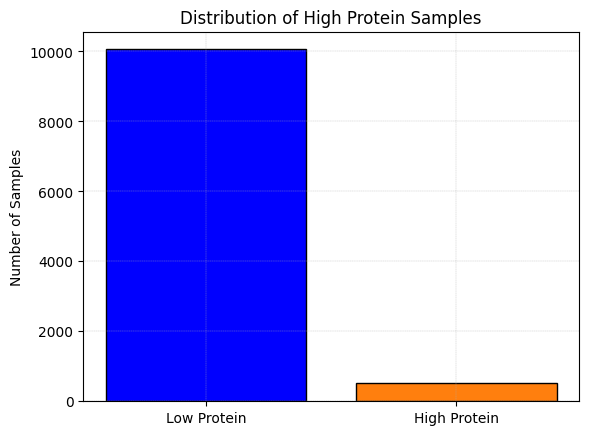

In [10]:
# Create a bar plot of the distribution
plt.bar(high_protein_counts.index, high_protein_counts.values, color = ['b', 'C1'], edgecolor = 'k')

# Set the x-axis labels
plt.xticks([0, 1], ['Low Protein', 'High Protein'])

# Set the y-axis label
plt.ylabel('Number of Samples')

# Set the plot title
plt.title('Distribution of High Protein Samples')

# Set the grid
plt.grid(linestyle = "--", linewidth = 0.25)

# Show the plot
plt.show()

### __Feature Importance__

In [11]:
X = df.drop('high_protein', axis = 1)
y = df['high_protein']


# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Display feature importances with feature names
feature_names = X.columns
# for feature, importance in zip(feature_names, importances):
#     print(f"{feature}: {importance:.4f}")

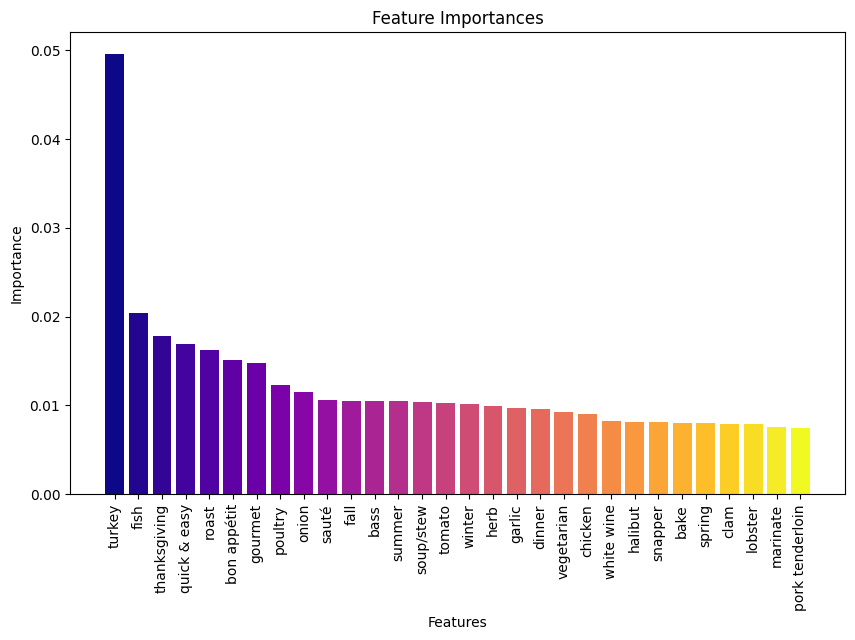

In [12]:
# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot first 30 feature importances
number_features = 30

# Create a list of colors
colors = plt.cm.plasma(np.linspace(0, 1, number_features))

plt.figure(figsize = (10, 6))
plt.bar(sorted_feature_names[:number_features], sorted_importances[:number_features], color = colors)
# Set the x-axis labels and rotate them vertically
plt.xticks(rotation = "vertical")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

### __Synthetic Minority Over-sampling Technique (SMOTE)__

In [13]:
# Feature columns are in 'X' and label column is in 'y'
X = df.drop('high_protein', axis = 1)
y = df['high_protein']

# Initialize the SMOTE instance
smote = SMOTE()

# Apply SMOTE to your dataset
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Combine the oversampled features and labels into a new DataFrame
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis = 1)

# Shuffle the resulting dataset
df_oversampled = df_oversampled.sample(frac = 1).reset_index(drop = True)

In [14]:
# Calculate the distribution of the "high_protein" column
high_protein_counts = df_oversampled['high_protein'].value_counts()
print(f"Number of low protein recipes : {high_protein_counts[0]}")
print(f"Number of high protein recipes : {high_protein_counts[1]}")

Number of low protein recipes : 10061
Number of high protein recipes : 10061


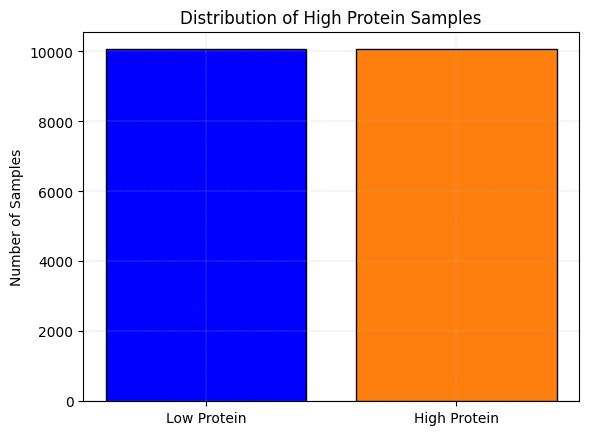

In [15]:
# Create a bar plot of the distribution
plt.bar(high_protein_counts.index, high_protein_counts.values, color = ['C1', 'b'], edgecolor = 'k')

# Set the x-axis labels
plt.xticks([0, 1], ['Low Protein', 'High Protein'])

# Set the y-axis label
plt.ylabel('Number of Samples')

# Set the plot title
plt.title('Distribution of High Protein Samples')

# Set the grid
plt.grid(linestyle = "--", linewidth = 0.25)

# Show the plot
plt.show()

### __Training and Validation Data__

In [16]:
validation_size = 0.1

X = df_oversampled.drop("high_protein", axis = 1)
y = df_oversampled["high_protein"]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = validation_size, random_state = 2023)

In [17]:
print(f"Number of data samples : {len(X)}")

Number of data samples : 20122


In [18]:
train_counts = len(y_train)
val_counts = len(y_val)
print(f"Number of train samples : {train_counts}")
print(f"Number of validation samples : {val_counts}")

Number of train samples : 18109
Number of validation samples : 2013


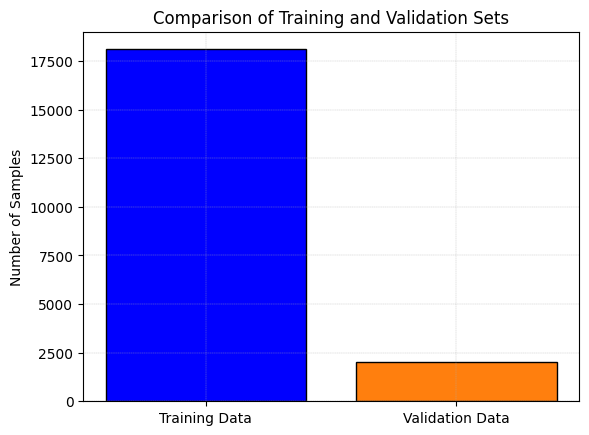

In [19]:
# Define the labels and counts for the bar chart
labels = ['Training Data', 'Validation Data']
counts = [train_counts, val_counts]

# Create a bar plot of the distribution
plt.bar(labels, counts, color = ['b', 'C1'], edgecolor = 'k')

# Set the x-axis labels
plt.xticks([0, 1], ['Training Data', 'Validation Data'])

# Set the y-axis label
plt.ylabel('Number of Samples')

# Set the plot title
plt.title('Comparison of Training and Validation Sets')

# Set the grid
plt.grid(linestyle = "--", linewidth = 0.25)

# Show the plot
plt.show()

### __Min-Max Normalization__

In [20]:
# Initialize a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to your features and transform them
X_train = scaler.fit_transform(X_train)

In [21]:
# Transform the val dataset features
X_val = scaler.transform(X_val)

### __Normalized original dataset__

In [22]:
# Separate the features and labels for the original dataset
X_original = df.drop('high_protein', axis = 1)
y_original = df['high_protein']

# Transform the original dataset features using the fitted scaler
X_original_normalized = scaler.transform(X_original)

# Convert the normalized features back to a DataFrame
X_original_normalized_df = pd.DataFrame(X_original_normalized, columns = X_original.columns)

# Combine the normalized features and labels into a new DataFrame
df_original_normalized = pd.concat([X_original_normalized_df, y_original], axis = 1)

In [23]:
X = df_original_normalized.drop("high_protein", axis = 1)
y = df_original_normalized["high_protein"]

# __2. Model Building and Ad Revenue__

In [24]:
def simulate(hp_predictions_and_actuals):
    high_protein_ad_revenue = 1
    low_protein_ad_revenue = .25
    
    ad_revenue = 0
    analysis_queue = []
    active_recipes = []
    i_data = 0
    for _ in range(365):  # for one year
        # 50-100 recipe submissions/day
        num_submissions = np.random.randint(50, 100)
        for __ in range(num_submissions): # 
            if i_data < len(hp_predictions_and_actuals):
                p, a = hp_predictions_and_actuals[i_data]
                
                if p == 1:  # go to the front of the queue
                    analysis_queue.insert(0, a)

                else: # go to the back of the queue
                    analysis_queue.append(a)
                i_data += 1
            
        # can analyze only 25 recipes/day   
        for __ in range(25):
            if len(analysis_queue)==0:
                break
            acutal = analysis_queue.pop(0)
            active_recipes.append(acutal)
                          
        # run 500-1000 ads/day
        num_ads_today = np.random.randint(500, 1000)
        for a in random.choices(active_recipes, k = num_ads_today):
            # a==1 if recipe is high protein
            if a==1:
                ad_revenue += high_protein_ad_revenue
            else:
                ad_revenue += low_protein_ad_revenue
    
    return ad_revenue

In [25]:
def std_revenue(revenues_list):
    # Standard deviation and standard error of revenues list
    mean = np.mean(revenues_list)
    std_dev = np.std(revenues_list, ddof = 1)  # Use ddof=1 for sample standard deviation
    std_error = std_dev / np.sqrt(len(revenues_list))
    
    # Round the standard error to 2 decimal places
    std_error_revenue = np.round(std_error, 2)
    return std_error_revenue

In [26]:
def best_parameters(model, param_grid):

    # Create the grid search object
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring ='accuracy', cv = 5, verbose = 1, n_jobs = -1)

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f'Best parameters: {best_params}')

    return grid_search.best_params_ #, grid_search.best_estimator_

In [27]:
def acc_cross(model, X, y_true):
    # Predict the classes for the validation set
    y_pred = model.predict(X)

    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(y_true, y_pred)

    # Predict the class probabilities for the validation set
    y_probs = model.predict_proba(X)

    # Calculate the log loss of the predictions
    logloss = log_loss(y_true, y_probs)

    print(f"Cross-Entropy Loss: {logloss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    return logloss, accuracy

In [28]:
# dictionary of lists
my_results = {"Model" : [],
        "Model_Parameters" : [],
        "Validation_Accuracy": [],
        "All_Data_Accuracy": [],
        "Validation_Cross-Entropy_Loss" : [],
        "All_Data_Cross-Entropy_Loss" : [],
        "Revenue" : [],
        "Standard_Error_Revenue" : []
}

## __2.1 Linear Regression with Threshold__

In [29]:
my_results["Model"].append("Linear Regression with Threshold")

### __Training and Validation__

In [30]:
# Define hyperparameter grid for Linear_Regression (Grid Search)
param_grid = {
    'threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'fit_intercept': [True, False],
    'positive': [True, False],
}

In [31]:
class Linear_Regression(BaseEstimator, ClassifierMixin):
    def __init__(self, threshold = 0.0, fit_intercept = True, positive = False):
        self.threshold = threshold
        self.fit_intercept = fit_intercept
        self.positive = positive
        self.model = LinearRegression(fit_intercept = self.fit_intercept, positive = self.positive)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        y_pred_labels = (y_pred >= self.threshold).astype(int)
        return y_pred_labels

    def predict_proba(self, X):
        y_pred = self.model.predict(X)
        y_pred_proba = np.vstack((1 - y_pred, y_pred)).T
        return y_pred_proba

In [32]:
# Find the best parameters for the linear regression model
# best_par_lin_reg = best_parameters(Linear_Regression(), param_grid)
best_par_lin_reg = {'fit_intercept': True, 'positive': True, 'threshold': 0.5}

In [33]:
my_results["Model_Parameters"].append(best_par_lin_reg)

In [34]:
# Train the LinearRegression model with the best hyperparameters
best_lin_reg = Linear_Regression(**best_par_lin_reg)
best_lin_reg.fit(X_train, y_train)

Linear_Regression(positive=True, threshold=0.5)

In [35]:
# Validation data
logloss, accuracy = acc_cross(best_lin_reg, X_val, y_val)

Cross-Entropy Loss: 0.6151
Accuracy: 0.8649


In [36]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [37]:
# Whole dataset
logloss, accuracy = acc_cross(best_lin_reg, X, y)

Cross-Entropy Loss: 0.8823
Accuracy: 0.8479


In [38]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [39]:
y_pred = best_lin_reg.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

lin_reg_revenue = simulate(hp_predictions_and_actuals)
print(f"Lin. regression revenue : $ {lin_reg_revenue}")

Lin. regression revenue : $ 90241.0


In [40]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
lin_reg_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std : $ {lin_reg_revenue_std_error}")

Revenue std : $ 27.49


In [41]:
my_results["Revenue"].append(lin_reg_revenue)
my_results["Standard_Error_Revenue"].append(lin_reg_revenue_std_error)

## __2.2 Logistic Regression__

In [42]:
my_results["Model"].append("Logistic Regression")

### __Training and Validation__

In [43]:
# Define hyperparameter grid for LogisticRegression (Grid Search)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [44]:
# best_par_log_reg = best_parameters(LogisticRegression(max_iter = 1000), param_grid)
best_par_log_reg = {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
my_results["Model_Parameters"].append(best_par_log_reg)

In [46]:
# Train the LogisticRegression model with the best hyperparameters
best_log_reg = LogisticRegression(**best_par_log_reg, max_iter = 1000)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear')

In [47]:
# Validation data
logloss, accuracy = acc_cross(best_log_reg, X_val, y_val)

Cross-Entropy Loss: 0.2091
Accuracy: 0.9434


In [48]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [49]:
# Whole dataset
logloss, accuracy = acc_cross(best_log_reg, X, y)

Cross-Entropy Loss: 0.2119
Accuracy: 0.9219


In [50]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [51]:
y_pred = best_log_reg.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

log_reg_revenue = simulate(hp_predictions_and_actuals)
print(f"Log. regression revenue : $ {log_reg_revenue}")

Log. regression revenue : $ 89189.5


In [52]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
log_reg_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std : $ {log_reg_revenue_std_error}")

Revenue std : $ 29.1


In [53]:
my_results["Revenue"].append(log_reg_revenue)
my_results["Standard_Error_Revenue"].append(log_reg_revenue_std_error)

## __2.3 K-Nearest Neighbors__

In [54]:
my_results["Model"].append("K-Nearest Neighbors")

### __Training and Validation__

In [55]:
# Define the hyperparameter search space (Grid Search)
param_grid = {
    'n_neighbors': range(1, 31, 2),  # K values from 1 to 30
    'weights': ['uniform', 'distance'],  # Different weight options
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Different distance metrics
}

In [56]:
# best_par_knn = best_parameters(KNeighborsClassifier(), param_grid)
best_par_knn = {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [57]:
my_results["Model_Parameters"].append(best_par_knn)

In [58]:
# Train the KNeighborsClassifier model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_par_knn)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [59]:
# Validation data
logloss, accuracy = acc_cross(best_knn, X_val, y_val)

Cross-Entropy Loss: 0.8237
Accuracy: 0.9771


In [60]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [61]:
# Whole dataset
logloss, accuracy = acc_cross(best_knn, X, y)

Cross-Entropy Loss: 0.1531
Accuracy: 0.9958


In [62]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [63]:
y_pred = best_knn.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

knn_revenue = simulate(hp_predictions_and_actuals)
print(f"KNN revenue : $ {knn_revenue}")

KNN revenue : $ 91447.25


In [64]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
knn_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std : $ {knn_revenue_std_error}")

Revenue std : $ 32.07


In [65]:
my_results["Revenue"].append(knn_revenue)
my_results["Standard_Error_Revenue"].append(knn_revenue_std_error)

## __2.4 Support Vector Machine__

In [66]:
my_results["Model"].append("Support Vector Machine")

### __Training and Validation__

In [67]:
# Define the hyperparameter grid (Grid Search)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [68]:
# best_par_svm = best_parameters(SVC(probability = True), param_grid)
best_par_svm = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [69]:
my_results["Model_Parameters"].append(best_par_svm)

In [70]:
# Get the best estimator
best_svm = SVC(**best_par_svm, probability = True, max_iter=1000)
best_svm.fit(X_train, y_train)

SVC(C=10, max_iter=1000, probability=True)

In [71]:
# Validation data
logloss, accuracy = acc_cross(best_svm, X_val, y_val)

Cross-Entropy Loss: 0.0107
Accuracy: 0.9930


In [72]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [73]:
# Whole dataset
logloss, accuracy = acc_cross(best_svm, X, y)

Cross-Entropy Loss: 0.0037
Accuracy: 0.9980


In [74]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [75]:
y_pred = best_svm.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

svm_revenue = simulate(hp_predictions_and_actuals)
print(f"SVM revenue : $ {svm_revenue}")

SVM revenue : $ 92513.5


In [76]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
svm_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std : $ {svm_revenue_std_error}")

Revenue std : $ 31.0


In [77]:
my_results["Revenue"].append(svm_revenue)
my_results["Standard_Error_Revenue"].append(svm_revenue_std_error)

## __2.5 Decision Tree__

In [78]:
my_results["Model"].append("Decision Tree")

### __Training and Validation__

In [79]:
# Define the hyperparameter grid (Grid Search)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

In [80]:
# best_par_decision_tree = best_parameters(DecisionTreeClassifier(random_state = 42), param_grid)
best_par_decision_tree = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [81]:
my_results["Model_Parameters"].append(best_par_decision_tree)

In [82]:
# Get the best estimator
best_decision_tree = DecisionTreeClassifier(**best_par_decision_tree, random_state = 42)
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

In [83]:
# Validation data
logloss, accuracy = acc_cross(best_decision_tree, X_val, y_val)

Cross-Entropy Loss: 0.9418
Accuracy: 0.9672


In [84]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [85]:
# Whole dataset
logloss, accuracy = acc_cross(best_decision_tree, X, y)

Cross-Entropy Loss: 0.1691
Accuracy: 0.9885


In [86]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [87]:
y_pred = best_decision_tree.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

decision_tree_revenue = simulate(hp_predictions_and_actuals)
print(f"Decision Tree revenue : $ {decision_tree_revenue}")

Decision Tree revenue : $ 90074.5


In [139]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
decision_tree_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std error: $ {decision_tree_revenue_std_error}")

Revenue std error: $ 31.79


In [89]:
my_results["Revenue"].append(decision_tree_revenue)
my_results["Standard_Error_Revenue"].append(decision_tree_revenue_std_error)

## __2.6 Random Forest__

In [90]:
my_results["Model"].append("Random Forest")

### __Training and Validation__

In [91]:
# Define the hyperparameter grid (Grid Search)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [92]:
# best_par_random_forest = best_parameters(RandomForestClassifier(), param_grid)
best_par_random_forest = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [93]:
my_results["Model_Parameters"].append(best_par_random_forest)

In [94]:
# Get the best estimator
best_random_forest = RandomForestClassifier(**best_par_random_forest)
best_random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [95]:
# Validation data
logloss, accuracy = acc_cross(best_random_forest, X_val, y_val)

Cross-Entropy Loss: 0.0594
Accuracy: 0.9876


In [96]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [97]:
# Whole dataset
logloss, accuracy = acc_cross(best_random_forest, X, y)

Cross-Entropy Loss: 0.0333
Accuracy: 0.9976


In [98]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [99]:
y_pred = best_random_forest.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

random_forest_revenue = simulate(hp_predictions_and_actuals)
print(f"Random Forest revenue : $ {random_forest_revenue}")

Random Forest revenue : $ 92592.25


In [100]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
random_forest_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std : $ {random_forest_revenue_std_error}")

Revenue std : $ 31.08


In [101]:
my_results["Revenue"].append(random_forest_revenue)
my_results["Standard_Error_Revenue"].append(random_forest_revenue_std_error)

## __2.7 Combine Model__

In [102]:
my_results["Model"].append("Combine Model")

### __Validation__

In [103]:
class Combine_Model():
    def __init__(self, model_1, model_2, model_3):
        self.model_1 = model_1
        self.model_2 = model_2
        self.model_3 = model_3

    def predict(self, X):
        output_1 = self.model_1.predict(X)
        output_2 = self.model_2.predict(X)
        output_3 = self.model_3.predict(X)

        # Average of our three best models
        pred_labels = np.around((output_1 + output_2 + output_3) / 3)

        return pred_labels
    
    def predict_proba(self, X):
        y_pred = self.predict(X)
        y_pred_proba = np.vstack((1 - y_pred, y_pred)).T
        
        return y_pred_proba

In [104]:
our_combine_model = Combine_Model(best_knn, best_svm, best_random_forest)

In [105]:
my_results["Model_Parameters"].append({"Model_1" : "best_knn", "Model_2" : "best_svm", "Model_3" : "best_random_forest"})

In [106]:
# Validation data
logloss, accuracy = acc_cross(our_combine_model, X_val, y_val)

Cross-Entropy Loss: 0.1791
Accuracy: 0.9950


In [107]:
my_results["Validation_Accuracy"].append(accuracy)
my_results["Validation_Cross-Entropy_Loss"].append(logloss)

### __Ad Revenue__

In [108]:
# Whole dataset
logloss, accuracy = acc_cross(our_combine_model, X, y)

Cross-Entropy Loss: 0.0340
Accuracy: 0.9991


In [109]:
my_results["All_Data_Accuracy"].append(accuracy)
my_results["All_Data_Cross-Entropy_Loss"].append(logloss)

In [110]:
y_pred = our_combine_model.predict(X)
hp_predictions_and_actuals = list(zip(y_pred, y))

our_combine_model_revenue = simulate(hp_predictions_and_actuals)
print(f"Random Forest revenue : $ {our_combine_model_revenue}")

Random Forest revenue : $ 91652.75


In [111]:
revenues_list = [simulate(hp_predictions_and_actuals) for _ in range(1000)]
our_combine_model_revenue_std_error = std_revenue(revenues_list)
print(f"Revenue std : $ {our_combine_model_revenue_std_error}")

Revenue std : $ 31.34


In [112]:
my_results["Revenue"].append(our_combine_model_revenue)
my_results["Standard_Error_Revenue"].append(our_combine_model_revenue_std_error)

# __Model Performance and Analysis__

In [121]:
df_results = pd.DataFrame(my_results)
df_results.sort_values("Validation_Accuracy", ascending=False, inplace=True)
df_results

,Model,Model_Parameters,Validation_Accuracy,All_Data_Accuracy,Validation_Cross-Entropy_Loss,All_Data_Cross-Entropy_Loss,Revenue,Standard_Error_Revenue
6,Combine Model,"{'Model_1': 'best_knn', 'Model_2': 'best_svm',...",0.995032,0.999056,0.179054,0.034026,91652.75,31.34
3,Support Vector Machine,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.993045,0.998018,0.010652,0.003711,92513.50,31.00
5,Random Forest,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.987581,0.997640,0.059426,0.033291,92592.25,31.08
2,K-Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.977149,0.995752,0.823650,0.153117,91447.25,32.07
4,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.967213,0.988483,0.941764,0.169140,90074.50,30.12
1,Logistic Regression,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.943368,0.921930,0.209124,0.211886,89189.50,29.10
0,Linear Regression with Threshold,"{'fit_intercept': True, 'positive': True, 'thr...",0.864878,0.847918,0.615118,0.882289,90241.00,27.49


In [138]:
df_results.Model_Parameters.tolist()

[{'Model_1': 'best_knn',
  'Model_2': 'best_svm',
  'Model_3': 'best_random_forest'},
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'},
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'},
 {'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5},
 {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'},
 {'fit_intercept': True, 'positive': True, 'threshold': 0.5}]

# __Predict__

In [ ]:
# combine the 3 best model and choose the mode of the predicts
def predict(data):

    if "title" in data.columns:
        # Remove the title column
        data.drop("title", axis = 1, inplace = True)
    
    # Normalization
    scaler = MinMaxScaler()
    X = scaler.fit_transform(data)
    
    # Three Best models
    pre = our_combine_model.predict(X)

    return pre

In [ ]:
df = pd.read_csv(r"final_data_set.csv", index_col = 0)
df.head()

,title,calories,protein,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,Rhubarb Roulade,256.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Caramel Macadamia Nut Crunch,223.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Grand Marnier Brownie Kisses,195.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Herb Salad Spring Rolls with Spicy Peanut Sauce,224.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Festival,219.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
if 'calories' in df.columns:
        # Remove the 'calories' column
        df.drop('calories', axis = 1, inplace = True)

if 'protein' in df.columns:
        # Remove the 'protein' column
        df.drop('protein', axis = 1, inplace = True)


pre = predict(df)

# __References__

- Hyper-parameter Tuning with GridSearchCV in Sklearn : https://datagy.io/sklearn-gridsearchcv/

- Create a Pandas DataFrame from Lists : https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/